Requirements

1. Perform exploratory data analysis (EDA) to understand the dataset.
2. Preprocess the data
3. Train at least three different approaches suitable for the given task.
4. Evaluate the models using appropriate metrics.
5. Perform hyperparameter tuning for at least one of the models.
6. Compare and analyze the results across the different models.
7. Summarize your findings and discuss the implications of your analysis.

In [211]:
import arff
import pandas as pd

# Load the ARFF file
with open("automobile.dat", 'r') as f:
    data = arff.load(f)

# Obtain Pandas DataFrame
df = pd.DataFrame(data['data'], columns=[attr[0] for attr in data['attributes']])

print(df.head())


   Normalized-losses        Make Fuel-type Aspiration Num-of-doors Body-style  \
0              168.0      toyota       gas        std          two      sedan   
1              113.0       mazda       gas        std         four      sedan   
2               87.0      toyota       gas        std          two  hatchback   
3              125.0  mitsubishi       gas        std         four      sedan   
4              148.0       dodge       gas      turbo         None      sedan   

  Drive-wheels Engine-location  Wheel-base  Length  ...  Fuel-system  Bore  \
0          rwd           front        94.5   168.7  ...         2bbl  3.19   
1          fwd           front        93.1   166.8  ...         2bbl  3.08   
2          fwd           front        95.7   158.7  ...         2bbl  3.05   
3          fwd           front        96.3   172.4  ...         2bbl  3.35   
4          fwd           front        93.7   157.3  ...         mpfi  3.03   

   Stroke Compression-ratio Horsepower  Peak

# EDA

The attribute we need to predict (Y): **Symboling** 

**Symboling** corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. A value of +3 indicates that the auto is risky, -2 that it is probably pretty safe.

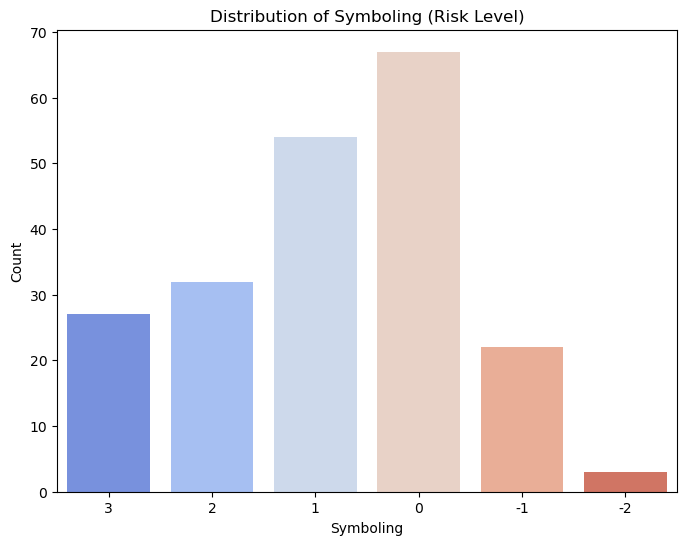

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

# it wasn't numeric
df['Symboling'] = pd.to_numeric(df['Symboling'], errors='coerce')

symboling_order = [3, 2, 1, 0, -1, -2]

plt.figure(figsize=(8,6))
sns.countplot(x='Symboling', data=df, order=symboling_order, palette="coolwarm")
plt.title('Distribution of Symboling (Risk Level)')
plt.xlabel('Symboling')
plt.ylabel('Count')
plt.show()

It looks like there is a slight skew, the cars are comparatively more risky than "what risk factor they are initally assigned based on their price."

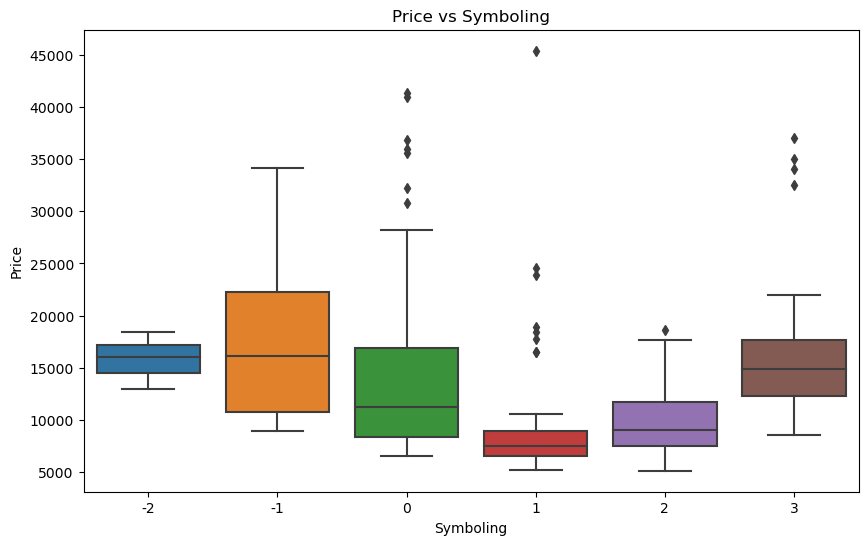

In [213]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Symboling', y='Price', data=df)
plt.title('Price vs Symboling')
plt.show()

Seems like expensive cars can also be surprisingly unsafe (probably some thrill-seeking sports cars)
It also looks like you can get a comparatively very safe car (-2) for the upper price range of basic cars (0)

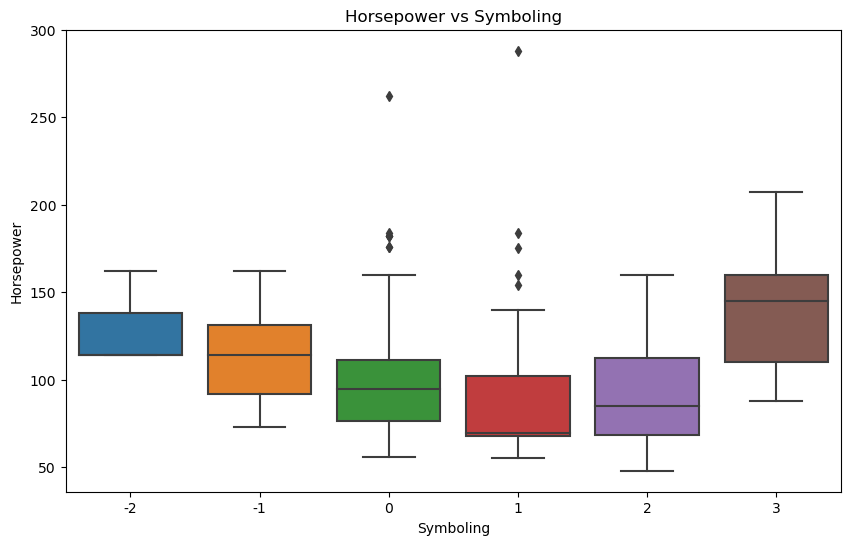

In [214]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Symboling', y='Horsepower', data=df)
plt.title('Horsepower vs Symboling')
plt.show()

As we thought, the non-safe cars are usually higher in horsepower than the other classes.

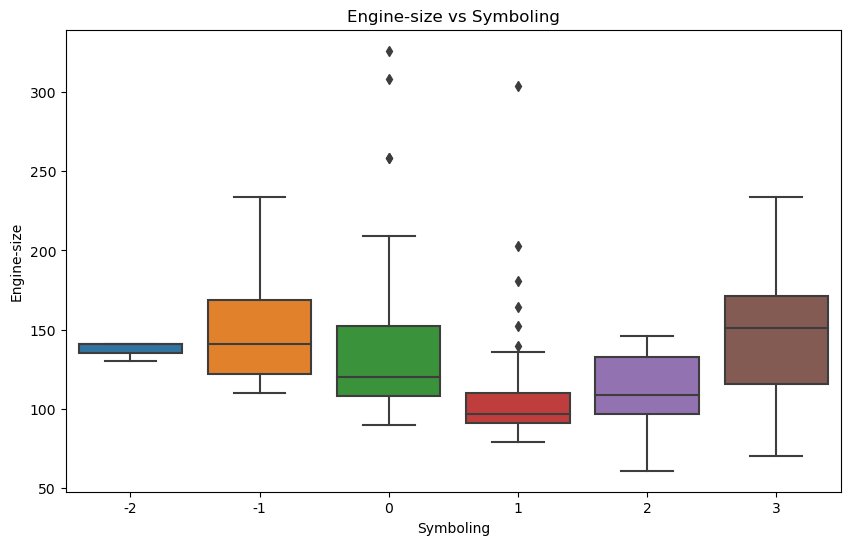

In [215]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Symboling', y='Engine-size', data=df)
plt.title('Engine-size vs Symboling')
plt.show()

Engine size tells the same story. Although we can notice that if you buy a car with a small engine size, you won't be picking between the safest options

# Preprocessing

In [216]:
# 5. Preserve y
from sklearn.model_selection import train_test_split
X = df.drop('Symboling', axis=1)  # Features
y = df['Symboling']  # Target variable

In [217]:
# Fill with mean for numbers
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_columns] = X[numerical_columns].fillna(X[numerical_columns].mean())

# Fill with mode for categoricals
categorical_columns = X.select_dtypes(include=['object']).columns
X[categorical_columns] = X[categorical_columns].fillna(X[categorical_columns].mode().iloc[0])

In [218]:
# 3. Convert categorical to dummy
X = pd.get_dummies(X, drop_first=True)

In [219]:
# Standardizing numbers
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [220]:
# Data preprocessed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train 3 models

In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100)
svm = SVC()

logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC()

In [222]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

print("\nRandom Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

print("\nSupport Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Logistic Regression
Accuracy: 0.7073170731707317
Classification Report:
               precision    recall  f1-score   support

          -1       0.80      0.57      0.67         7
           0       0.64      0.90      0.75        10
           1       0.73      0.85      0.79        13
           2       0.50      0.40      0.44         5
           3       1.00      0.50      0.67         6

    accuracy                           0.71        41
   macro avg       0.74      0.64      0.66        41
weighted avg       0.73      0.71      0.70        41


Random Forest
Accuracy: 0.7560975609756098
Classification Report:
               precision    recall  f1-score   support

          -1       0.80      0.57      0.67         7
           0       0.75      0.90      0.82        10
           1       0.85      0.85      0.85        13
           2       0.50      0.80      0.62         5
           3       1.00      0.50      0.67         6

    accuracy                           0.76 

Logistic Regression and Random Forest both have 71% accuracy. SVM performs the worst with 66% accuracy. Symboling class "2" seems hardest to predict.

# Hyperparameter tuning - Random Forest

In [223]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_dep

In [224]:
# Show the best parameter configuration again
best_rf = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100
)

best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.7560975609756098
Classification Report:
               precision    recall  f1-score   support

          -1       0.80      0.57      0.67         7
           0       0.75      0.90      0.82        10
           1       0.85      0.85      0.85        13
           2       0.50      0.80      0.62         5
           3       1.00      0.50      0.67         6

    accuracy                           0.76        41
   macro avg       0.78      0.72      0.72        41
weighted avg       0.80      0.76      0.75        41



Accuracy increased from 70% to 75.6%. It was best for predicting Symboling class '1', but class '3' was the worst performing with a recall of 50%.